In [7]:
import pathlib
import platform

import pandas as pd
import numpy as np
from numpy import pi as PI
import pymc3 as pm
import theano.tensor as tt
from sklearn.preprocessing import StandardScaler, scale


import matplotlib.pyplot as pl
import matplotlib.dates as mdates
from matplotlib import rcParams
import arviz as az

In [4]:
def print_versions(*pkg):
    print(f'python: {platform.python_version()}')
    for pkgi in pkg:
        print(f'{pkgi.__name__}: {pkgi.__version__}')

print_versions(pd, np, pm, az)

python: 3.7.3
pandas: 0.24.2
numpy: 1.16.4
pymc3: 3.7
arviz: 0.4.1


In [5]:
%matplotlib inline
az.style.use('arviz-darkgrid')

In [6]:
years = mdates.YearLocator(day=15, base=2)
months = mdates.MonthLocator(bymonthday=15)
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 4
rcParams['xtick.minor.visible'] = True
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 18
rcParams['axes.formatter.limits'] = (-3, 2)

In [8]:
home = pathlib.Path.home()
proj_path = home / 'PROJEX/SouthernOcean/'
proj_path.exists()

True

In [9]:
df = pd.read_pickle('../../pickleJar/df.pkl')
#df.index.name=''
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 1997-09-01 to 2018-04-01
Data columns (total 14 columns):
sam        248 non-null float64
aao        248 non-null float64
iostz      248 non-null float64
iosostz    248 non-null float64
postz      248 non-null float64
posostz    248 non-null float64
aostz      248 non-null float64
aosostz    248 non-null float64
iopooz     241 non-null float64
popooz     188 non-null float64
aopooz     248 non-null float64
iosaaz     248 non-null float64
posaaz     248 non-null float64
aosaaz     248 non-null float64
dtypes: float64(14)
memory usage: 29.1 KB


In [10]:
d = df[['aostz']].copy()

In [14]:
d['y_scaled'] = scale(d.aostz)
d.insert(0, 't', (d.index - d.index.min()) / (d.index.max() - d.index.min()))

In [15]:
d.describe()

,t,aostz,y_scaled
count,248.000000,248.000000,2.480000e+02
mean,0.501317,0.292012,-5.013910e-16
std,0.290879,0.043535,1.002022e+00
min,0.000000,0.199870,-2.120801e+00
25%,0.251862,0.261736,-6.968440e-01
50%,0.501862,0.281545,-2.409161e-01
75%,0.752029,0.315765,5.467135e-01
max,1.000000,0.415390,2.839748e+00


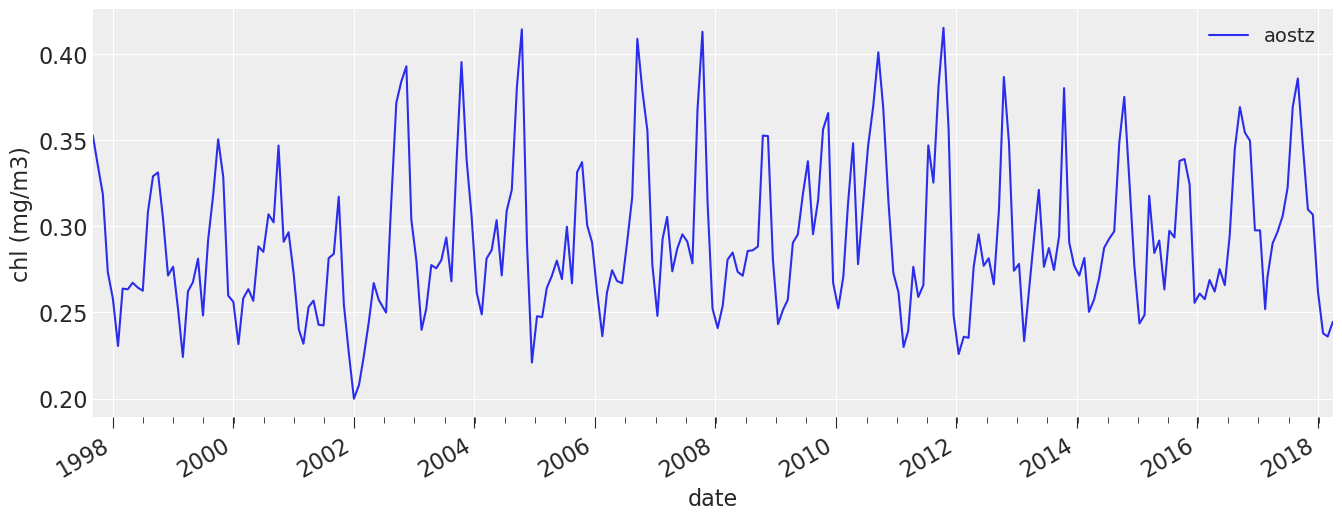

In [18]:
d.plot(y='aostz', figsize=(16, 6))
pl.ylabel('chl (mg/m3)');

In [19]:
np.random.seed(25)
n_changepoints = 10
t = np.arange(1000)
s = np.sort(np.random.choice(t, n_changepoints, replace=False))

In [20]:
s

array([ 49, 279, 288, 305, 599, 627, 688, 698, 775, 988])

In [23]:
A = (t[:, None] > s) * 1

In [28]:
delta = np.random.normal(size=n_changepoints)

In [29]:
base_growth = 1
base_offset = 5

In [31]:
growth = (base_growth + A@delta)*t

In [32]:
gamma = -s * delta

In [33]:
offset = base_offset + A @ gamma